In [179]:
# some imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the data
df = pd.read_csv('aoe_data.csv')

# drop match uid -- not needed for analysis
df = df.drop(columns=['Unnamed: 0', 'match_id', 'dataset', 'difficulty'])

# Age of Empires II Match Analysis

This notebook analyzes Age of Empires II match data to identify patterns in win rates across different maps and civilizations. The analysis will focus on identifying which civilizations perform best on the two most popular maps - Arabia and Arena.

In [180]:
# view and check the data
df.sample(3)
#df.info()

,map,map_size,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
86379,Arabia,Tiny,2019,1331.0,Magyars,Huns,75.0,79.0,23.0,94.0,1
120511,Arabia,Tiny,3064,1086.0,Mongols,Mongols,40.0,31.0,97.0,28.0,1
108120,Arabia,Tiny,1171,1204.5,Ethiopians,Vikings,79.0,69.0,25.0,97.0,0


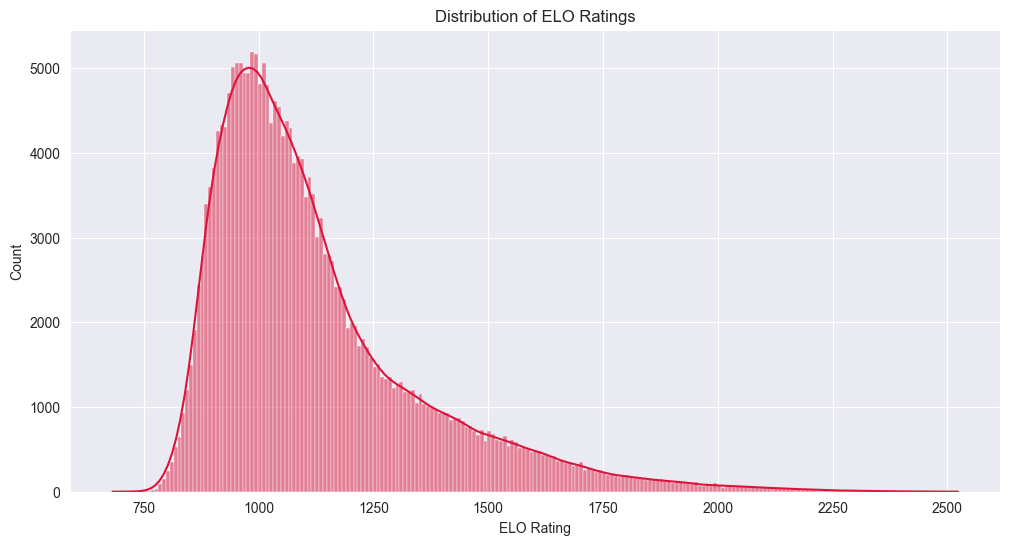

In [181]:
# from our previous notebook - let's recap
# ELO distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['elo'], kde=True, color='crimson')
plt.title('Distribution of ELO Ratings')
plt.xlabel('ELO Rating')
plt.ylabel('Count')
plt.show()

## Player Skill Distribution

First, let's look at the distribution of ELO ratings in our dataset. ELO is a measure of player skill, with higher values indicating more skilled players. This helps us understand the skill range represented in our match data.

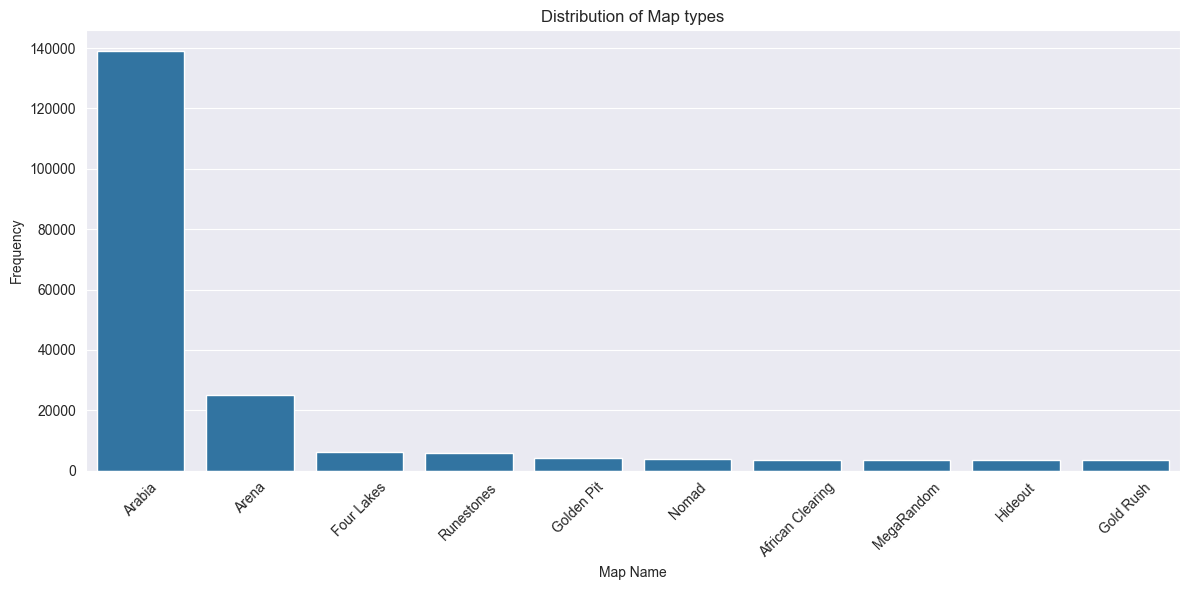

map
Arabia              138902
Arena                25074
Four Lakes            6162
Runestones            5725
Golden Pit            4315
Nomad                 3756
African Clearing      3689
MegaRandom            3617
Hideout               3566
Gold Rush             3459
Name: count, dtype: int64


In [182]:
# let's get an understanding of map selection
vis = df['map'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(vis)
plt.title('Distribution of Map types')
plt.xlabel('Map Name')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# print our top 6 numbers
print(vis)

## Map Distribution Analysis

Now we'll examine the frequency of different maps in our dataset. This will help us identify the most popular maps for focused analysis.

In [183]:
# clearly a massive advantage for arabia and arena, and then the rest
# generate win_rate % -- used in our previous analysis. 
p1_civs = df.groupby(['p1_civ', 'map'], observed=True).agg({'winner': lambda x: sum(x == 1)/len(x) * 100 if len(x) > 0 else 50}).reset_index()
p2_civs = df.groupby(['p2_civ', 'map'], observed=True).agg({'winner': lambda x: sum(x == 2)/len(x) * 100 if len(x) > 0 else 50}).reset_index()

# bring them together
all_civs = pd.concat([p1_civs, p2_civs])

# Rename columns for clarity
p1_civs.columns = ['civ', 'map', 'win_rate']
p2_civs.columns = ['civ', 'map', 'win_rate']

# Create a dataframe that shows civ win_rate per map, removing NANs (no matchups) and setting civ to index. 
all_civs = pd.concat([p1_civs, p2_civs])
all_civs = all_civs[all_civs['win_rate'] > 0]
all_civs = all_civs.set_index('civ')

# reset index for plotting
all_civs = all_civs.reset_index()

## Win Rate Calculation

The following analysis calculates win rates for each civilization on each map. This is done by:

1. Grouping player 1 and player 2 data separately by civilization and map
2. Calculating the percentage of games won by each civilization
3. Combining the data for comprehensive analysis

This will reveal which civilizations have advantages on specific maps.

In [184]:
# let's look at some of the output
print(all_civs.sample(6))

             civ              map   win_rate
129      Britons           Haboob  63.157895
964        Malay         Fortress  66.666667
638        Incas          Hideout  52.941176
1010     Malians       Golden Pit  38.636364
1335       Slavs          Islands  50.000000
1558  Vietnamese  Volcanic Island  42.857143


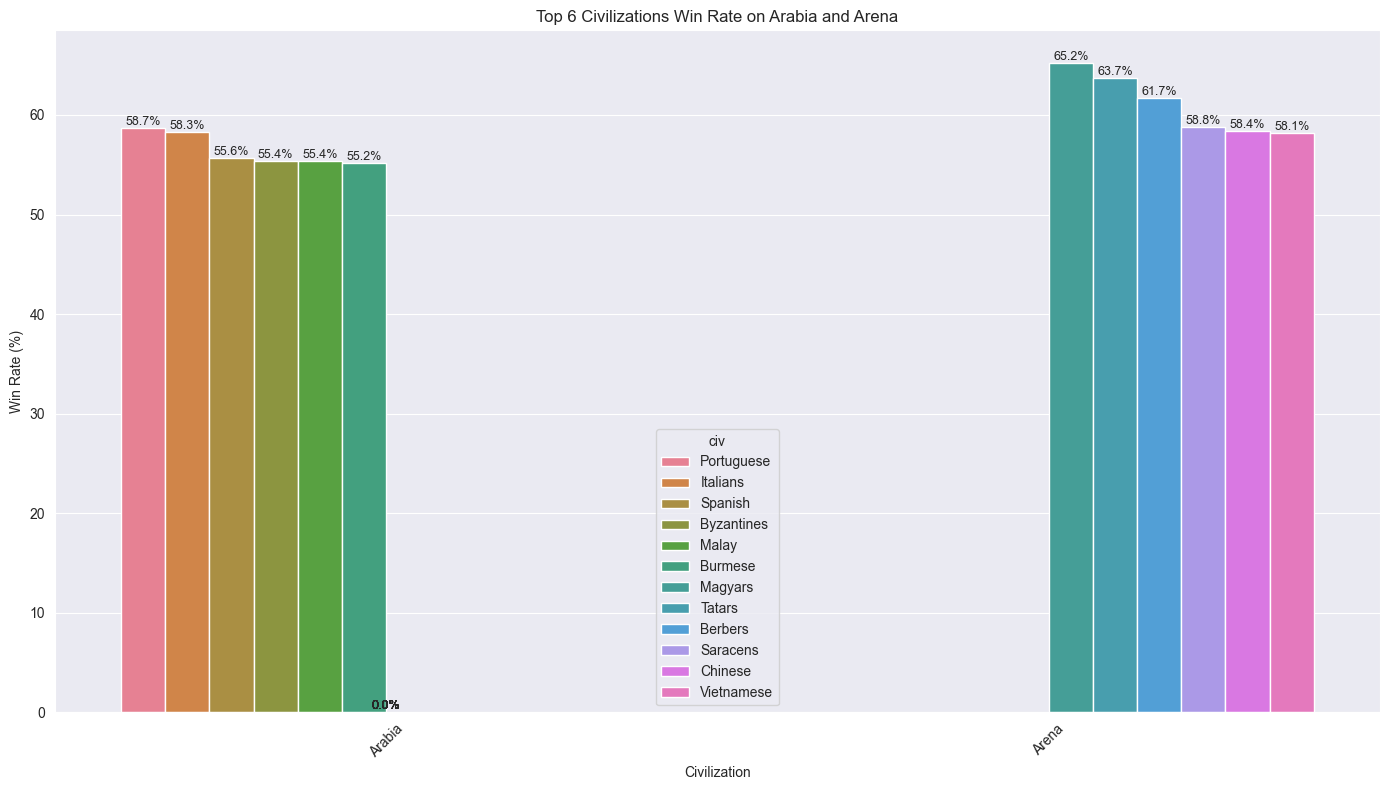

In [187]:
# filter data for arabia and arena
arabia_top = all_civs[all_civs['map'] == 'Arabia'].sort_values(by='win_rate', ascending=False).head(6)
arena_top = all_civs[all_civs['map'] == 'Arena'].sort_values(by='win_rate', ascending=False).head(6)

# combine the data
combined_data = pd.concat([arabia_top, arena_top])

# build the plot
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')

# Create the grouped barplot
ax = sns.barplot(x='map', y='win_rate', hue='civ', data=combined_data)

# Add percentage labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# customise plot
plt.title('Top 6 Civilizations Win Rate on Arabia and Arena')
plt.xlabel('Civilization')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
#plt.margins(x=0.15)
#plt.legend(title='Map Type', loc='upper right')  
plt.tight_layout()
plt.show()

## Top Civilizations by Map

This visualization shows the top 6 civilizations with the highest win rates on Arabia and Arena, the two most popular maps. The grouped barplot allows for easy comparison between maps and civilizations.

## Conclusion

From our analysis, we can draw several key insights:

1. **Map Preference**: Arabia and Arena are significantly more popular than other maps, suggesting these are standard competitive environments.

2. **Civilization Balance**: There are clear differences in civilization performance across maps. The top performers on Arabia differ from those on Arena, highlighting how map characteristics influence civilization strengths.

3. **Win Rate Variation**: The range of win rates among top civilizations (approximately 51-58%) suggests that while certain civilizations have advantages, the game maintains reasonable balance with no overwhelmingly dominant options.

4. **Map-Specific Strategies**: Players should consider selecting different civilizations based on the map for optimal performance.

Future analysis could explore how these win rates vary across different player skill levels (ELO ranges) or investigate specific matchups between civilizations.